In [30]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
import random
from sklearn.model_selection import train_test_split
from numpy import linalg

## Ridge regression

Ridge regression is a type of regression that introduces the concept of regularization through the alpha parameter in the ERM; at the end of this project we will see how to calibrate the value of this parameter

A regressor is a function

<img src = "images/regressor.png" width = "200">

 where <em>w</em> is a vector of real coefficients (weights), and <em>x</em> refers to the <em>x</em> component of training set

As anticipated before, the ERM is regularized by parameter <b>alpha</b>

<img src= "images/ridge_regression.png" width = "350"/>

where S is the <b>design matrix</b>, the matrix of examples without labels

$\nabla(\left \| Sw - y \right \|^2 + \alpha \left \| w \right \|^2) = 2(S^TSw - S^Ty) + 2\alpha w$

since we want to minimize this function, let's set it equal to 0 and we obtain

$(S^TS + \alpha I)w = S^Ty$

$w = (S^TS + \alpha I)^{-1} S^Ty$

In [7]:
def ERM(S, y, alfa):
    return linalg.inv(S.T.dot(S) + alfa * np.eye(S.shape[1])).dot(S.T.dot(y))

The regularization is needed since, without it, the vector is unstable; in particular, it can change a lot when the dataset is perturbed and let's keep in mind that we had to deal with missing values, hence we changed a fex examples and this could have led to a variance error.

In [13]:
def predict(x, w):
    predictions = []
    for index, i in x.iterrows():
        predictions.append(w.T.dot(i))
    return predictions

In [21]:
def square_loss(prediction, y):
    return (y - prediction)**2

### Loading preprocessed datasets

Let's load the preprocessed datasets, we will handle 4 cases:
1. the complete dataset with replaced missing values normalized with min-max
2. the reduced dataset (missing values have been removed) with min-max normalization
3. the complete dataset with z-score normalization
4. the reduced dataset normalized with z-score

In [2]:
min_max_norm_dataset = pd.read_csv("datasets/min_max_norm_dataset")
min_max_norm_reduced_dataset = pd.read_csv("datasets/min_max_norm_reduced_dataset")

zscore_norm_dataset = pd.read_csv("datasets/zscore_norm_dataset")
zscore_norm_reduced_dataset = pd.read_csv("datasets/zscore_norm_reduced_dataset")

In [3]:
del min_max_norm_dataset["Unnamed: 0"]
del min_max_norm_reduced_dataset["Unnamed: 0"]
del zscore_norm_dataset["Unnamed: 0"]
del zscore_norm_reduced_dataset["Unnamed: 0"]

### Splitting in training and test set

In [4]:
def split_dataset(dataset):
    y = dataset["median_house_value"]
    x = dataset.drop("median_house_value", axis = 1)
    return train_test_split(x, y, test_size = 0.2)

### First dataset

In [5]:
x_train, x_test, y_train, y_test = split_dataset(min_max_norm_dataset)

We apply the ERM for the training, we obtain a w vector of weights that depends on alpha parameter and we can test it on the test set to see how good predictions are done

In [8]:
w = ERM(x_train, y_train, 0.1)
w

array([-0.14717538, -0.08519059,  0.1721641 , -0.79473952,  1.25587063,
       -2.53199913,  0.94849957,  1.26676428,  0.22079604])

In [14]:
predictions = predict(x_test, w)

In [68]:
predictions[:10]

[-0.5565538431692961,
 0.8059346005033206,
 -1.3944608848560665,
 0.07151972815853824,
 0.5287419574183375,
 0.24717832219038283,
 0.26761809839095674,
 -0.7460945211268839,
 -0.6850931053778438,
 -1.0872830444447592]

In [25]:
loss = square_loss(predictions, y_test)

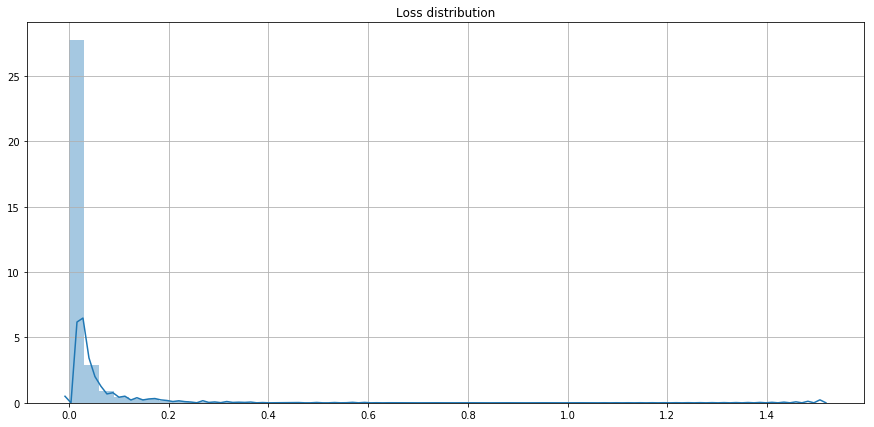

In [40]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
seaborn.distplot(loss.values)
plt.grid()
plt.show()

### Second dataset

In [50]:
x_train, x_test, y_train, y_test = split_dataset(min_max_norm_reduced_dataset)

We apply the ERM for the training, we obtain a w vector of weights that depends on alpha parameter and we can test it on the test set to see how good predictions are done

In [51]:
w = ERM(x_train, y_train, 0.1)
w

array([-0.1422814 , -0.08517669,  0.1690406 , -0.79423394,  1.31798594,
       -2.51078661,  0.87382694,  1.26663863,  0.2190467 ])

In [52]:
predictions = predict(x_test, w)

In [69]:
predictions[:10]

[-0.5565538431692961,
 0.8059346005033206,
 -1.3944608848560665,
 0.07151972815853824,
 0.5287419574183375,
 0.24717832219038283,
 0.26761809839095674,
 -0.7460945211268839,
 -0.6850931053778438,
 -1.0872830444447592]

In [54]:
loss = square_loss(predictions, y_test)

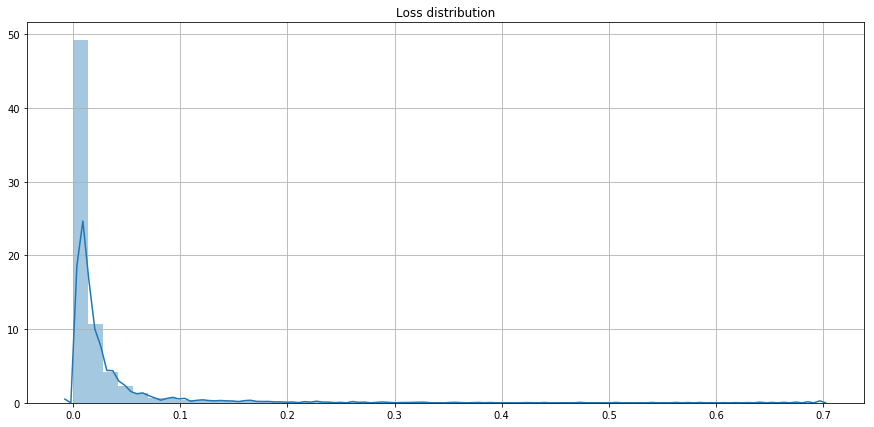

In [55]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
seaborn.distplot(loss.values)
plt.grid()
plt.show()

### Third dataset

In [56]:
x_train, x_test, y_train, y_test = split_dataset(zscore_norm_dataset)

We apply the ERM for the training, we obtain a w vector of weights that depends on alpha parameter and we can test it on the test set to see how good predictions are done

In [57]:
w = ERM(x_train, y_train, 0.1)
w

array([-0.55623724, -0.55942874,  0.13133562, -0.12515713,  0.35429059,
       -0.36822383,  0.18456631,  0.6569066 ,  0.12521852])

In [58]:
predictions = predict(x_test, w)

In [70]:
predictions[:10]

[-0.5565538431692961,
 0.8059346005033206,
 -1.3944608848560665,
 0.07151972815853824,
 0.5287419574183375,
 0.24717832219038283,
 0.26761809839095674,
 -0.7460945211268839,
 -0.6850931053778438,
 -1.0872830444447592]

In [60]:
loss = square_loss(predictions, y_test)

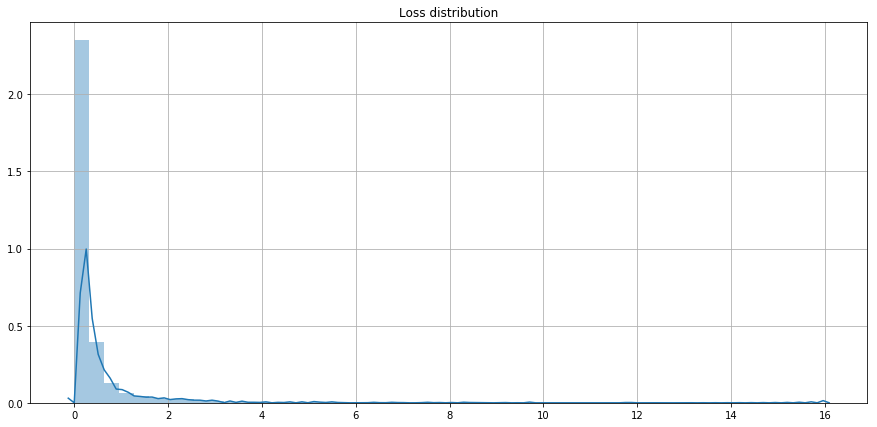

In [61]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
seaborn.distplot(loss.values)
plt.grid()
plt.show()

### Fourth dataset

In [62]:
x_train, x_test, y_train, y_test = split_dataset(zscore_norm_reduced_dataset)

We apply the ERM for the training, we obtain a w vector of weights that depends on alpha parameter and we can test it on the test set to see how good predictions are done

In [63]:
w = ERM(x_train, y_train, 0.1)
w

array([-0.54658023, -0.55029374,  0.1255751 , -0.12395557,  0.35035638,
       -0.3805799 ,  0.19915359,  0.65163274,  0.12708604])

In [64]:
predictions = predict(x_test, w)

In [71]:
predictions[:10]

[-0.5565538431692961,
 0.8059346005033206,
 -1.3944608848560665,
 0.07151972815853824,
 0.5287419574183375,
 0.24717832219038283,
 0.26761809839095674,
 -0.7460945211268839,
 -0.6850931053778438,
 -1.0872830444447592]

In [66]:
loss = square_loss(predictions, y_test)

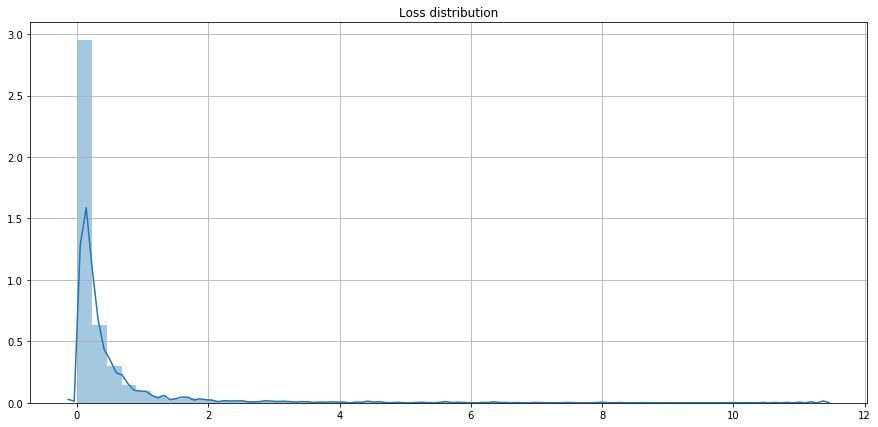

In [67]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
seaborn.distplot(loss.values)
plt.grid()
plt.show()